In [66]:
from scipy.spatial import distance
from scipy.ndimage import gaussian_filter
import os
import cv2
import math
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
from skimage import io, color
from PIL import Image

In [60]:
image_path1 = r'C:\\Users\\H_JOLLY\\Downloads\\images\\train\\100850.jpg'
image_path2 = r'C:\\Users\\H_JOLLY\\Downloads\\images\\train\\7550.jpg'

image = Image.open(image_path1)
image = np.array(image)
print("PIL - ", image.shape)

img = io.imread(image_path1)
print("Skimage - ", img.shape)

PIL -  (424, 600, 3)
Skimage -  (424, 600, 3)


In [72]:
#Loading Image Function with respect to Gray
def load_image(pathofImage, isGray=True):
    image = io.imread(pathofImage)
    gray = lab = rgb = None
    
    if(len(image.shape)==2):
        gray = image
    elif len(image.shape)>=3:
        lab = color.rgb2lab(image)
        rgb = (color.lab2rgb(lab)*255).astype(np.uint8)
        gray = (color.rgb2gray(image)*255).astype(int)
    else:
        print('_____Image shape not allowed_____')
    
    if isGray:
        return gray
    else:
        return image, lab

In [67]:
#Matrix values with respect to intensity values of the neighbouring pixels
def similatiry_matrix(center_value, window_values, sigma_r, gray_img):
    matrix = np.full(window_values.shape, center_value)
    
    if gray_img:
        d_matrix = np.absolute(window_values-matrix)
    else:
        d_matrix = np.linalg.norm(window_values-matrix, axis=2)
    
    return np.exp((-0.5)*((d_matrix**2/sigma_r**2)))

In [68]:
#Matrix values with respect to closeness of the neighbouring pixels in spatial domain
def spatial_kernel(size, sigma):
    kernel = np.empty((size,size))
    c_x = int(size/2)
    c_y = int(size/2)

    for i in range(size):
        for j in range(size):
            d = distance.euclidean([j, i], [c_x, c_y])
            kernel[j, i] = np.exp((-0.5)*((d**2/sigma**2)))
            
    return kernel

In [69]:
#Filtering the image using similarity matrix and spatial kernal
def bilateral_filter(img, sigma_d, sigma_r, window_size=7):
    height = img.shape[1]
    length = img.shape[0]
    half_wsize = int(window_size/2)
    
    is_gray=None
    if (len(img.shape)==3):
        is_gray=False
    elif (len(img.shape)==2):
        is_gray=True
    
    C_matrix = spatial_kernel(window_size, sigma_d)
    filtered_img = np.zeros(img.shape)
    
    for y in range(height):
        y_low  = max(y-half_wsize, 0)
        y_high = min(y+half_wsize+1, height)
        for x in range(length):
            x_low  = max(x-half_wsize, 0)
            x_high = min(x+half_wsize+1, length)
            
            S_matrix = similatiry_matrix(img[x, y], img[x_low:x_high, y_low:y_high], sigma_r, is_gray)
            w_matrix = C_matrix[half_wsize-x+x_low:x_high-x+half_wsize, half_wsize-y+y_low:y_high-y+half_wsize] * \
                        S_matrix
            
            if not is_gray:
                filtered_pixel = (np.sum(img[x_low:x_high, y_low:y_high]*np.stack((w_matrix,w_matrix,w_matrix), axis=2), axis=(0,1)) / np.sum(w_matrix))
            else:
                filtered_pixel = (np.sum(img[x_low:x_high, y_low:y_high]*w_matrix) / np.sum(w_matrix)).astype(int)
            filtered_img[x, y] = filtered_pixel
            
    return filtered_img

In [75]:
def apply_bilateral_filter(image_path):
    rgb, lab = load_image(image_path, False)
    filteredimagelab = bilateral_filter(lab, sigma_d=3, sigma_r=3, window_size=9)
    # print(type(filteredimagelab)) 
    return filteredimagelab

In [77]:
#Bilateral filtering on a color image
image1_path = r'C:\\Users\\H_JOLLY\\Downloads\\images\\train\\155920.jpg'
   
def apply_bilateral_filter(image_path):
    rgb, lab = load_image(image_path, False)
    filteredimagelab = bilateral_filter(lab, sigma_d=3, sigma_r=3, window_size=9)
    # print(type(filteredimagelab)) 
    return filteredimagelab

apply_bilateral_filter(image1_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

(-0.5, 319.5, 259.5, -0.5)

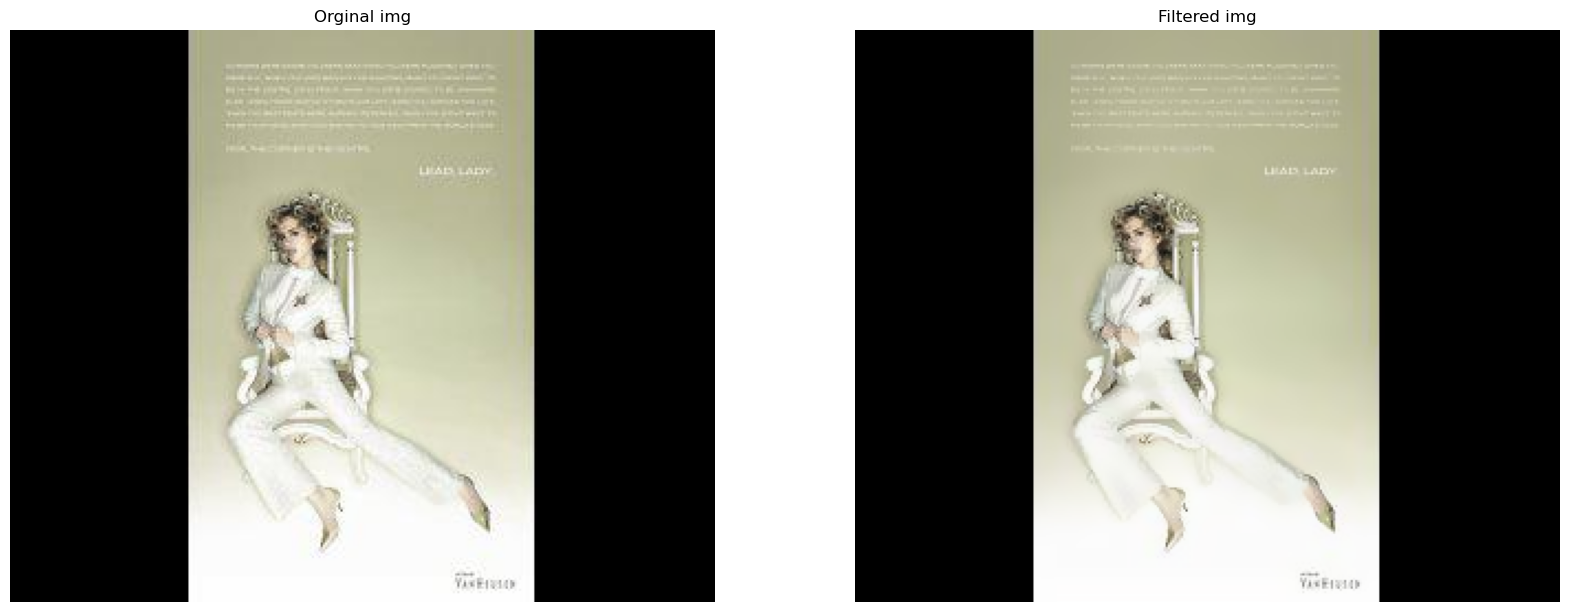

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))
ax1.set_title("Orginal img")
ax1.imshow(rgb)
ax1.axis('off')
ax2.set_title("Filtered img")
ax2.imshow((color.lab2rgb(filteredimagelab)*255).astype(np.uint8))
ax2.axis('off')